In [79]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [29]:
# log directory for tensorflow log
tf_log_dir = "C:\\Users\\cssar\\890CA\\lstm-mimic\\logs\\"

In [2]:
numpy_feature_file = "C:\\Users\\cssar\\890CA\\lstm-mimic\\features.npy"
numpy_target_file = "C:\\Users\\cssar\\890CA\\lstm-mimic\\targets.npy"

In [3]:
# load numpy files
X_data = np.load(numpy_feature_file)
y_data = np.load(numpy_target_file)

In [4]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33, random_state=42)

In [41]:
y_train.shape

(4379, 1)

## Develop LSTM Model

LSTM Models requres three-dimensional input with `[Sample, timestamps, features]`. In previous cell, we can see that we have loaded data as required here.

In [62]:
# fit and evaluate a model
def get_model(trainX, trainy):
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    model = Sequential()
    model.add(LSTM(10, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.1))
    model.add(Dense(n_outputs, activation='sigmoid'))
    
    return model

In [63]:
model = get_model(X_train, y_train)
model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    loss= 'binary_crossentropy',
    metrics = ['accuracy']
)

tensorboard_callbacks = tf.keras.callbacks.TensorBoard(
    log_dir=tf_log_dir
)

verbose, epochs, batch_size = 2, 500, 100
model.fit(X_train, y_train,
    epochs=epochs, 
    batch_size=batch_size, 
    verbose=verbose, 
    validation_data = (X_test, y_test),
    callbacks = [tensorboard_callbacks]
) 


 0.8956 - val_loss: 0.3626 - val_accuracy: 0.8512
Epoch 311/500
4379/4379 - 0s - loss: 0.2605 - accuracy: 0.8929 - val_loss: 0.3810 - val_accuracy: 0.8391
Epoch 312/500
4379/4379 - 0s - loss: 0.2626 - accuracy: 0.8890 - val_loss: 0.3517 - val_accuracy: 0.8544
Epoch 313/500
4379/4379 - 0s - loss: 0.2566 - accuracy: 0.8931 - val_loss: 0.3404 - val_accuracy: 0.8581
Epoch 314/500
4379/4379 - 0s - loss: 0.2581 - accuracy: 0.8956 - val_loss: 0.3566 - val_accuracy: 0.8526
Epoch 315/500
4379/4379 - 0s - loss: 0.2658 - accuracy: 0.8883 - val_loss: 0.3493 - val_accuracy: 0.8554
Epoch 316/500
4379/4379 - 0s - loss: 0.2539 - accuracy: 0.9013 - val_loss: 0.3574 - val_accuracy: 0.8544
Epoch 317/500
4379/4379 - 0s - loss: 0.2625 - accuracy: 0.8913 - val_loss: 0.3442 - val_accuracy: 0.8595
Epoch 318/500
4379/4379 - 0s - loss: 0.2591 - accuracy: 0.8924 - val_loss: 0.3575 - val_accuracy: 0.8554
Epoch 319/500
4379/4379 - 0s - loss: 0.2642 - accuracy: 0.8908 - val_loss: 0.3477 - val_accuracy: 0.8572
Epoch

In [76]:
y_pred =  model.predict(X_test)
y_pred = (y_pred > 0.5) * 1


In [73]:
mask = (y_pred > 0.5) *1
mask.shape

(2157, 1)

<AxesSubplot:>

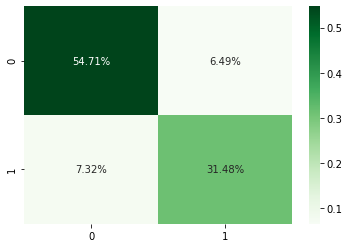

In [80]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')

In [83]:
print(classification_report(y_test, y_pred))
print('===============================================================================')
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      1320
         1.0       0.83      0.81      0.82       837

    accuracy                           0.86      2157
   macro avg       0.86      0.85      0.85      2157
weighted avg       0.86      0.86      0.86      2157

0.8525849896817638


In [84]:
precision_recall_curve(y_test, y_pred)

(array([0.38803894, 0.82905983, 1.        ]),
 array([1.        , 0.81123059, 0.        ]),
 array([0, 1]))